# __Scrape Fight Records from fightmetric.com__

## Libraries

In [1]:
%matplotlib inline

import requests
import pandas as pd
import string
import time
from bs4 import BeautifulSoup
from pandas.plotting import scatter_matrix
import os 

/anaconda3/envs/fight_prediction/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Url Setup

In [2]:
page_link_part1 = "http://www.fightmetric.com/statistics/fighters?char="
page_link_part2 = "&page=all"

## Loop Through Each Character/Table 

In [3]:
# Create a list of dataframes to concat later
dfs_r = []

# List of lowercase alphabet
all_chars = string.ascii_lowercase

# Loop though each character
for char in all_chars:
    url = page_link_part1 + char + page_link_part2
    table = pd.read_html(url)[0]
    dfs_r.append(table)
    time.sleep(1)


## Concat dfs

In [4]:
df_r = pd.concat(dfs_r)

# Drops rows that have NaN values for all columns
df_r = df_r.dropna(axis=0,how="all")

df_r.head()

,First,Last,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
1,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5.0,3.0,0.0,NaN
2,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4.0,6.0,0.0,NaN
3,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10.0,14.0,0.0,NaN
4,Shamil,Abdurakhimov,Abrek,"6' 3""",235 lbs.,"76.0""",Orthodox,19.0,4.0,0.0,NaN
5,Hiroyuki,Abe,Abe Ani,"5' 6""",145 lbs.,--,Orthodox,8.0,14.0,3.0,NaN


## Data Wrangling

In [5]:
df_r.dtypes

First        object
Last         object
Nickname     object
Ht.          object
Wt.          object
Reach        object
Stance       object
W           float64
L           float64
D           float64
Belt        float64
dtype: object

In [6]:
# Trim Whitespaces
df_obj = df_r.select_dtypes(['object'])
df_r[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

# Create function to convert height into inches 
def convert_to_inches(height):
    if( (height != "NaN") & (height != "--") ):
        result = float(height.split("'")[0]) * 12 + float(height.split("'")[1].split('"')[0])
        return(result)
    else:
        return(None)

# Convert height into float
df_r['Ht.'] = df_r['Ht.'].apply(convert_to_inches)

# Convert weight into float
df_r['Wt.'] = df_r['Wt.'].apply(lambda x: x.split(" ")[0])

# Convert reach into float
df_r['Reach'] = df_r['Reach'].apply(lambda x: x.split('"')[0])

df_r.head()

,First,Last,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
1,Tom,Aaron,NaN,NaN,155,--,NaN,5.0,3.0,0.0,NaN
2,Danny,Abbadi,The Assassin,71.0,155,--,Orthodox,4.0,6.0,0.0,NaN
3,David,Abbott,Tank,72.0,265,--,Switch,10.0,14.0,0.0,NaN
4,Shamil,Abdurakhimov,Abrek,75.0,235,76.0,Orthodox,19.0,4.0,0.0,NaN
5,Hiroyuki,Abe,Abe Ani,66.0,145,--,Orthodox,8.0,14.0,3.0,NaN


## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110e38b00>,
      dtype=object)

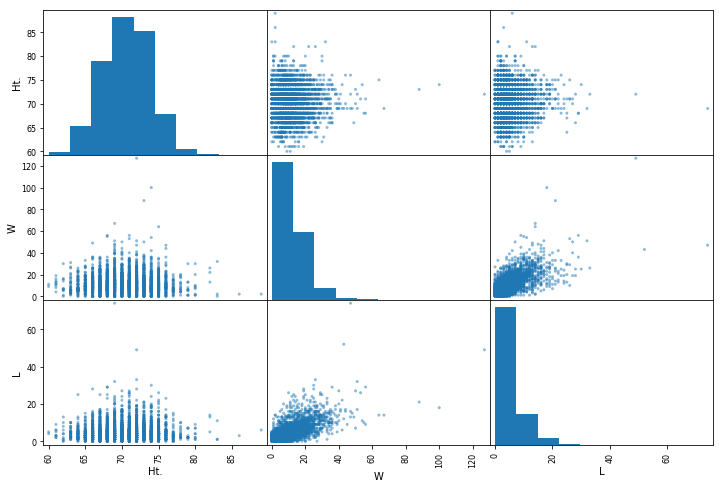

In [7]:
s_attr  = ['Ht.','Wt.','Reach','W','L']
scatter_matrix(df_r[s_attr], figsize=(12,8))

In [8]:
df_r.head()

,First,Last,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
1,Tom,Aaron,NaN,NaN,155,--,NaN,5.0,3.0,0.0,NaN
2,Danny,Abbadi,The Assassin,71.0,155,--,Orthodox,4.0,6.0,0.0,NaN
3,David,Abbott,Tank,72.0,265,--,Switch,10.0,14.0,0.0,NaN
4,Shamil,Abdurakhimov,Abrek,75.0,235,76.0,Orthodox,19.0,4.0,0.0,NaN
5,Hiroyuki,Abe,Abe Ani,66.0,145,--,Orthodox,8.0,14.0,3.0,NaN


# __Scrape Historical Fight Data__

## Soup Setup

In [ ]:
h_url = "http://www.fightmetric.com/statistics/events/completed?page=all"
page = requests.get(h_url)
soup = BeautifulSoup(page.content, 'html.parser')

## Get URLs for each fight event

In [ ]:
for event in s_event_urls:
    l_page = requests.get(event)
    l_soup = BeautifulSoup(l_page.content, 'html.parser')
    
    l_soup.find
    print(l_soup.title)

In [ ]:
pd.read_table("http://www.fightmetric.com/fight-details/28c70663b99560a8")